## Retail Sales Analysis

Objective:
    
Analyze weekly retail sales data from multiple store locations to identify sales trends, evaluate the impact of holidays and promotional markdowns, and compare store performance across different formats and sizes.

Dataset Description :
- Sales.csv : Weekly sales data for each store and department
- Features.csv : Additional info like fuel prices, CPI, holidays, markdowns
- Stores.csv : Metadata about store types and sizes

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

## Load the csv files

In [2]:
sales_df=pd.read_csv(r"C:\Users\Biswajeet Jena\Downloads\RetailSalesAnalysis\sales data-set.csv")

features_df=pd.read_csv(r"C:\Users\Biswajeet Jena\Downloads\RetailSalesAnalysis\Features data set.csv")

stores_df=pd.read_csv(r"C:\Users\Biswajeet Jena\Downloads\RetailSalesAnalysis\stores data-set.csv")

In [3]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
# Check the shape of the dataframe
sales_df.shape

(421570, 5)

In [5]:
# Check the basic information about the dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Data Cleaning

In [6]:
# Change the Dtype of Date column 
sales_df.Date=pd.to_datetime(sales_df.Date)

C:\Users\Biswajeet Jena\AppData\Local\Temp\ipykernel_15644\3295167530.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df.Date=pd.to_datetime(sales_df.Date)


In [7]:
sales_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [8]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Check the shape of the Dataframe
features_df.shape

(8190, 12)

In [10]:
# Check the basic info about the Dataframe
features_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
# Change the Dtype of Date to datetime
features_df['Date']=pd.to_datetime(features_df['Date'])

C:\Users\Biswajeet Jena\AppData\Local\Temp\ipykernel_15644\1046820799.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  features_df['Date']=pd.to_datetime(features_df['Date'])


In [12]:
features_df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [13]:
# Check all the columns having total number of missing values
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [14]:
features_df[features_df['MarkDown1'].isnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8095,45,2011-07-10,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,False
8096,45,2011-10-14,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,False
8097,45,2011-10-21,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,False
8098,45,2011-10-28,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,False


In [15]:
# Fill the missing values of 'MarkDown1' as 0
features_df['MarkDown1']=features_df['MarkDown1'].fillna(0)
features_df['MarkDown1']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
8185    4842.29
8186    9090.48
8187    3789.94
8188    2961.49
8189     212.02
Name: MarkDown1, Length: 8190, dtype: float64

In [16]:
# Smilillarl we will fill the missing values of MarkDown2,MarkDown3,MarkDown4,MarkDown5 as 0
features_df['MarkDown2']=features_df['MarkDown2'].fillna(0)
features_df['MarkDown3']=features_df['MarkDown3'].fillna(0)
features_df['MarkDown4']=features_df['MarkDown4'].fillna(0)
features_df['MarkDown5']=features_df['MarkDown5'].fillna(0)

In [17]:
# Check each column having total number of missing values
features_df.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [18]:
# Check the 'CPI' column having missing values
features_df[features_df['CPI'].isnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-03-05,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-10-05,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [19]:
# Sort by date
features_df = features_df.sort_values('Date')
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1308,8,2010-01-10,68.70,2.603,0.00,0.00,0.00,0.00,0.00,215.031003,6.433,False
5676,32,2010-01-10,66.14,2.759,0.00,0.00,0.00,0.00,0.00,190.673824,9.137,False
7132,40,2010-01-10,62.01,2.717,0.00,0.00,0.00,0.00,0.00,132.756800,5.287,False
34,1,2010-01-10,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,False
2946,17,2010-01-10,60.07,2.853,0.00,0.00,0.00,0.00,0.00,126.234600,6.885,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,12,2013-12-07,92.61,3.737,3409.33,977.89,80.96,8574.06,1997.97,NaN,NaN,False
6913,38,2013-12-07,92.61,3.737,109.65,0.00,82.51,0.00,845.94,NaN,NaN,False
2545,14,2013-12-07,79.37,3.614,4472.61,1389.15,121.37,1373.90,3850.61,NaN,NaN,False
1453,8,2013-12-07,83.16,3.400,4018.39,893.36,95.35,1586.56,3186.00,NaN,NaN,False


In [20]:
# Set 'Date' as index for time-based interpolation
features_df.set_index('Date', inplace=True)

In [21]:
# Fill the missing values by using interpolate 
features_df['CPI'] = features_df['CPI'].interpolate(method='time')

In [22]:
features_df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-01-10,8,68.70,2.603,0.00,0.00,0.00,0.00,0.00,215.031003,6.433,False
2010-01-10,32,66.14,2.759,0.00,0.00,0.00,0.00,0.00,190.673824,9.137,False
2010-01-10,40,62.01,2.717,0.00,0.00,0.00,0.00,0.00,132.756800,5.287,False
2010-01-10,1,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,False
2010-01-10,17,60.07,2.853,0.00,0.00,0.00,0.00,0.00,126.234600,6.885,False
...,...,...,...,...,...,...,...,...,...,...,...
2013-12-07,12,92.61,3.737,3409.33,977.89,80.96,8574.06,1997.97,132.716097,NaN,False
2013-12-07,38,92.61,3.737,109.65,0.00,82.51,0.00,845.94,132.716097,NaN,False
2013-12-07,14,79.37,3.614,4472.61,1389.15,121.37,1373.90,3850.61,132.716097,NaN,False


In [23]:
# Check 'Unemployment' column having missing values
features_df[features_df['Unemployment'].isna()]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2013-03-05,21,65.51,3.386,14645.02,50.94,21.64,6257.79,1571.81,225.489499,NaN,False
2013-03-05,44,54.51,3.535,50.66,0.00,14.27,0.00,703.63,225.489499,NaN,False
2013-03-05,45,56.07,3.592,8345.40,6.00,92.96,3580.32,2242.24,225.489499,NaN,False
2013-03-05,40,54.09,3.601,4017.10,3.00,38.34,969.50,1746.41,225.489499,NaN,False
2013-03-05,24,56.72,3.775,10594.55,0.00,70.55,7033.58,1503.35,225.489499,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
2013-12-07,12,92.61,3.737,3409.33,977.89,80.96,8574.06,1997.97,132.716097,NaN,False
2013-12-07,38,92.61,3.737,109.65,0.00,82.51,0.00,845.94,132.716097,NaN,False
2013-12-07,14,79.37,3.614,4472.61,1389.15,121.37,1373.90,3850.61,132.716097,NaN,False


In [24]:
# Interpolate Unemployment using time method
features_df['Unemployment'] = features_df['Unemployment'].interpolate(method='time')

In [25]:
features_df.isna().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

## Combine both sales_df and features_df using merge

In [26]:
combined_df=pd.merge(sales_df,features_df,on=['Store','Date'],how='left')
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-05-10,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [27]:
# Drop the 'IsHoliday_y' column
combined_df.drop(columns=['IsHoliday_y'],inplace=True)

In [28]:
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-05-10,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [29]:
# Rename 'IsHoliday_X' column as 'IsHoliday'
combined_df.rename(columns={'IsHoliday_x': 'IsHoliday'},inplace=True)

In [30]:
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-05-10,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [31]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [32]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [33]:
# Create a final_df that will combine both combined_df and stores_df using merge
final_df=pd.merge(combined_df,stores_df, on=['Store'],how='left')
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-05-10,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [34]:
final_df.sort_values('Date',inplace=True)
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
320135,33,96,2010-01-10,7854.09,False,91.45,3.001,0.00,0.0,0.00,0.00,0.00,126.234600,9.265,A,39690
166671,17,93,2010-01-10,3533.76,False,60.07,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,6.885,B,93188
292156,30,85,2010-01-10,43.92,False,70.28,2.603,0.00,0.0,0.00,0.00,0.00,211.329874,8.163,C,42988
292297,30,87,2010-01-10,119.80,False,70.28,2.603,0.00,0.0,0.00,0.00,0.00,211.329874,8.163,C,42988
84936,9,55,2010-01-10,6795.58,False,69.08,2.603,0.00,0.0,0.00,0.00,0.00,215.214134,6.560,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8509,1,82,2012-12-10,21963.11,False,62.99,3.601,2086.18,0.0,8.11,602.36,5926.45,223.381296,6.573,A,151315
86278,9,81,2012-12-10,2526.96,False,60.09,3.601,520.41,0.0,6.01,0.00,2839.84,227.169392,4.954,B,125833
178185,19,7,2012-12-10,27983.12,False,48.29,4.186,2374.50,0.0,7.25,919.32,6101.00,138.911700,7.992,A,203819
20008,2,95,2012-12-10,145394.36,False,60.97,3.601,2145.50,0.0,33.31,586.83,10421.01,223.015426,6.170,A,202307


## Feature Engineering

In [35]:
# Create a 'Year' column in the finl_df which will extract the year from 'Date' column
final_df['Year']=final_df['Date'].dt.year
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year
320135,33,96,2010-01-10,7854.09,False,91.45,3.001,0.00,0.0,0.00,0.00,0.00,126.234600,9.265,A,39690,2010
166671,17,93,2010-01-10,3533.76,False,60.07,2.853,0.00,0.0,0.00,0.00,0.00,126.234600,6.885,B,93188,2010
292156,30,85,2010-01-10,43.92,False,70.28,2.603,0.00,0.0,0.00,0.00,0.00,211.329874,8.163,C,42988,2010
292297,30,87,2010-01-10,119.80,False,70.28,2.603,0.00,0.0,0.00,0.00,0.00,211.329874,8.163,C,42988,2010
84936,9,55,2010-01-10,6795.58,False,69.08,2.603,0.00,0.0,0.00,0.00,0.00,215.214134,6.560,B,125833,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8509,1,82,2012-12-10,21963.11,False,62.99,3.601,2086.18,0.0,8.11,602.36,5926.45,223.381296,6.573,A,151315,2012
86278,9,81,2012-12-10,2526.96,False,60.09,3.601,520.41,0.0,6.01,0.00,2839.84,227.169392,4.954,B,125833,2012
178185,19,7,2012-12-10,27983.12,False,48.29,4.186,2374.50,0.0,7.25,919.32,6101.00,138.911700,7.992,A,203819,2012
20008,2,95,2012-12-10,145394.36,False,60.97,3.601,2145.50,0.0,33.31,586.83,10421.01,223.015426,6.170,A,202307,2012


In [36]:
final_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Year                     int64
dtype: object

In [37]:
final_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
dtype: int64

## Exploratory Data Analysis (EDA)

C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  func(*args, **kwargs)
C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


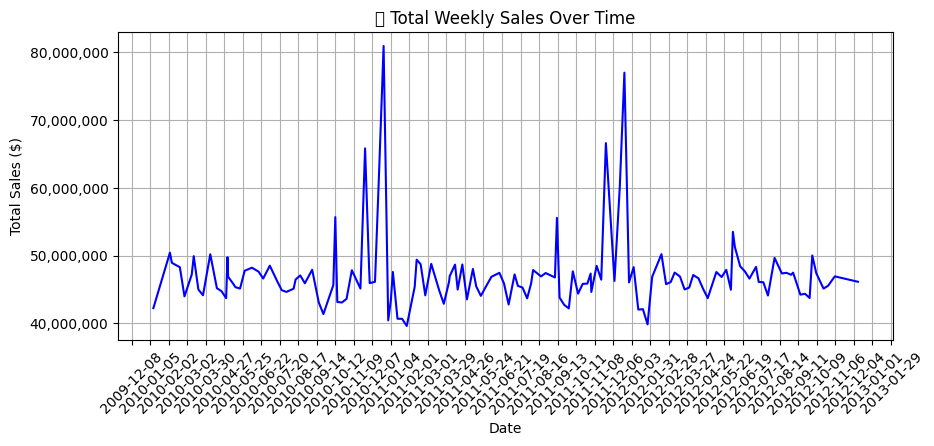

In [38]:
# Total Weekly Sales Over Time
weekly_sales = final_df.groupby("Date")["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=weekly_sales, x="Date", y="Weekly_Sales", color='blue')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("📈 Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid()

Text(0, 0.5, 'Total Sales ($)')

C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


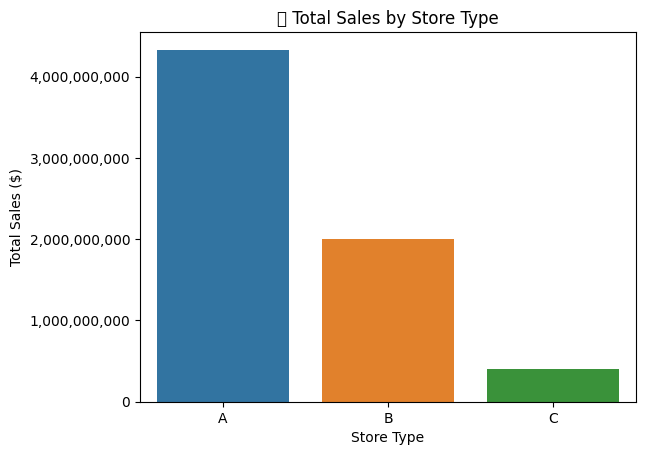

In [39]:
# Total Sales by Store Type
store_type_sales = final_df.groupby("Type")["Weekly_Sales"].sum().reset_index()

plt.figure()
sns.barplot(data=store_type_sales, x="Type", y="Weekly_Sales")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("🏪 Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales ($)")

([<matplotlib.axis.XTick at 0x1c9bc563310>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127882 (\N{CONFETTI BALL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127882 (\N{CONFETTI BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


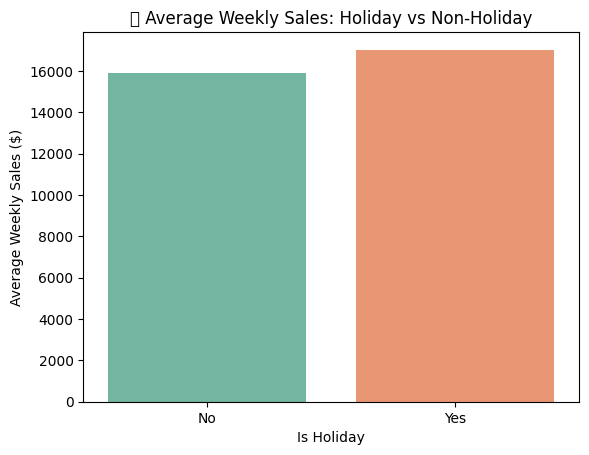

In [40]:
# Holiday vs Non-Holiday
holiday_sales = final_df.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

plt.figure()
sns.barplot(data=holiday_sales, x="IsHoliday", y="Weekly_Sales", palette="Set2")
plt.title("🎊 Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales ($)")
plt.xticks([0, 1], ['No', 'Yes'])

Text(0, 0.5, 'Weekly Sales ($)')

C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Biswajeet Jena\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


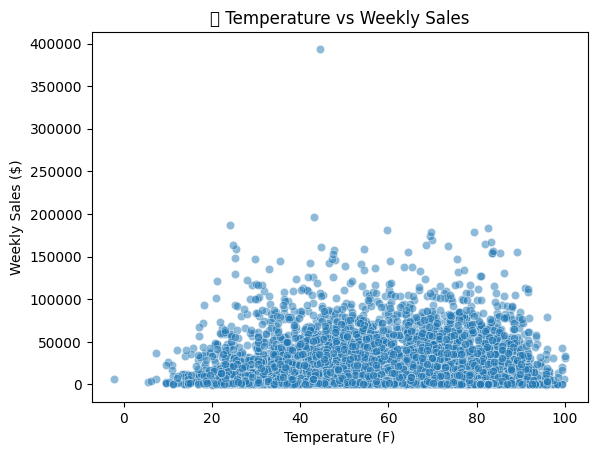

In [41]:
# Temperature vs Weekly Sales
plt.figure()
sns.scatterplot(data=final_df.sample(10000), x="Temperature", y="Weekly_Sales", alpha=0.5)
plt.title("🌡️ Temperature vs Weekly Sales")
plt.xlabel("Temperature (F)")
plt.ylabel("Weekly Sales ($)")

In [42]:
# 📉 Unemployment Trend
unemployment_trend = final_df.groupby("Date")["Unemployment"].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=economic_trends, x="Date", y="Unemployment", label="Unemployment", color="red")
plt.title("📉 Unemployment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")

NameError: name 'economic_trends' is not defined

<Figure size 1400x600 with 0 Axes>

In [ ]:
# CPI Trend
plt.figure(figsize=(14, 6))
cpi_trend = final_df.groupby("Date")["CPI"].mean().reset_index()
sns.lineplot(data=economic_trends, x="Date", y="CPI", label="CPI", color="green")
plt.title("📈 CPI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Consumer Price Index")

In [ ]:
# Fuel Price vs Sales
fuel_vs_sales = final_df.groupby('Date')[['Fuel_Price', 'Weekly_Sales']].agg({
    'Fuel_Price': 'mean',
    'Weekly_Sales': 'sum'
}).reset_index()

plt.figure()
sns.scatterplot(data=fuel_vs_sales, x='Fuel_Price', y='Weekly_Sales', color='purple',alpha=0.4)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("⛽ Fuel Price vs Total Weekly Sales", fontsize=16)
plt.xlabel("Average Fuel Price ($)")
plt.ylabel("Total Weekly Sales ($)")

In [ ]:
# 🛒 Top 5 Departments
department_sales = final_df.groupby('Dept')['Weekly_Sales'].sum().reset_index()
top5_departments = department_sales.sort_values(by='Weekly_Sales', ascending=False).head(5)

plt.figure(figsize=(8, 6))
sns.barplot(data=top5_departments, x='Dept', y='Weekly_Sales', palette='viridis')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("💼 Total Weekly Sales by Top 5 Departments", fontsize=16)
plt.xlabel("Department")
plt.ylabel("Total Weekly Sales($)")

In [ ]:
# Sales by Year
plt.figure()
sns.barplot(data=yearly_sales,x='Year',y='Weekly_Sales')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("Total Sales By Year")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")

In [ ]:
# MarkDown Correlation
markdown_corr = final_df[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(markdown_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Between MarkDown Features and Weekly Sales", fontsize=14)

## Observations :

- Sales increase a lot during holidays, especially in November.
- Store Type A has the most sales, much more than B and C.
- Sales are a little higher during holidays than on normal weeks.
- Departments 92 and 95 have the highest weekly sales overall.
- Sales were highest in 2011 and lowest in 2012.
- Markdowns have very low effect on weekly sales overall.